# Project

### Credit Card Fraud Detection


#### Context
Credit card companies aim to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The dataset contains transactions made by credit cards in September 2013 by european cardholders.
Transactions occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) account for 0.172% of all transactions. <br>

It contains numerical input variables V1-V28 which are the result of a Principal Component Analysis (PCA) transformation, as original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction Amount. 'Class' is the response variable (labelled outcome) and it takes value 1 in case of fraud and 0 otherwise.  <br>

### Module 1: Data Exploration

In [1]:
import numpy as np 
import pandas as pd 
np.random.seed(3)
#Load the training dataset and display the first few rows to gain an overview of the table and the values in each column.
df = pd.read_csv('creditcard_train.csv') 
df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
#This provides summary statistics for all columns, giving us a general overview of their statistical properties.
df.describe() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,...,284657.000000,284379.000000,284137.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000
mean,94820.043168,0.000942,-0.000761,0.001280,-0.000844,0.000591,0.000233,0.000956,-0.000145,0.000553,...,-0.000075,-0.000035,0.000011,0.000045,-0.000016,0.000008,-0.000056,-0.000008,88.340966,0.001553
std,47486.331846,1.955946,1.649907,1.510265,1.413999,1.378060,1.332089,1.230796,1.192554,1.097575,...,0.733731,0.725929,0.625052,0.605657,0.521244,0.482238,0.403245,0.330077,250.129519,0.039374
min,0.000000,-56.407510,-72.715728,-48.325590,-5.683171,-113.743300,-26.160506,-43.557240,-73.216718,-13.434070,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565680,-15.430080,0.000000,0.000000
25%,54208.000000,-0.920083,-0.598696,-0.889759,-0.848833,-0.691445,-0.768153,-0.553921,-0.208633,-0.642783,...,-0.228421,-0.542878,-0.162192,-0.354543,-0.317147,-0.326978,-0.070844,-0.052954,5.600000,0.000000
50%,84704.000000,0.018393,0.065213,0.179930,-0.020146,-0.054336,-0.274058,0.040115,0.022323,-0.051198,...,-0.029518,0.007694,-0.011614,0.041012,0.016532,-0.052152,0.001326,0.011233,22.000000,0.000000
75%,139324.000000,1.315753,0.803360,1.027294,0.742826,0.611926,0.398611,0.570420,0.327241,0.597343,...,0.186287,0.529204,0.148051,0.439603,0.350702,0.240932,0.091001,0.078243,77.150000,0.000000
max,172792.000000,2.454930,22.057730,9.382558,16.875340,34.801666,73.301630,120.589500,20.007208,15.594990,...,27.202839,10.503090,22.528410,4.584549,7.519589,3.517346,31.612200,33.847808,25691.160000,1.000000


In [3]:
#As we can see here that the V22 and V23 columns have some null values which we have to deal with.
df.isnull().sum() 

Time        0
V1          0
V2          0
V3          0
V4          0
V5          0
V6          0
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13         0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20         0
V21         0
V22       278
V23       520
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class       0
dtype: int64

In [4]:
#We drop rows with null values in the 'V22' and 'V23' columns, as their count is minimal compared to the total number of rows.
df = df.dropna(subset=['V22', 'V23'])

#This resets the index of the DataFrame.
df = df.reset_index(drop=True)

# This checks for any remaining null values in the DataFrame.
df.isnull().sum().max()  # Indicates there are no more null values in the dataset.

#A total of 798 rows were removed due to missing values, leaving 283,859 rows for further analysis.

0

In [5]:
# Count the number of fraudulent and non-fraudulent transactions
fraud_count = df[df['Class'] == 1].shape[0]  # Count of rows where Class is 1 (fraudulent)
non_fraud_count = df[df['Class'] == 0].shape[0]  # Count of rows where Class is 0 (non-fraudulent)

#Print the counts.
print(f"Rows with fraud (Class=1): {fraud_count}")
print(f"Rows without fraud (Class=0): {non_fraud_count}")

Rows with fraud (Class=1): 442
Rows without fraud (Class=0): 283417


In [6]:
#Calculating quartiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#Determining outlier boundaries
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

#Creating a new data frame that consists of only rows that contain outliers.
outlier_condition = (df < lower_bound) | (df > upper_bound)
new = df[outlier_condition.any(axis=1)] 

#The goal here is to determine if the outliers present in different columns correspond to the same rows where the Class equals 1. 
#If these outliers are associated with fraud cases, it indicates that they are significant for detection, and we should retain them.

fraud_df = new[new['Class'] == 1]
fraud_df.shape
fraud_df.info()

#As we observe, in every instance when the Class == 1, the row contains an outlier indicating that
#these outliers are significant for detecting fraud. Therefore, we will retain them.

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 618 to 280730
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    442 non-null    float64
 1   V1      442 non-null    float64
 2   V2      442 non-null    float64
 3   V3      442 non-null    float64
 4   V4      442 non-null    float64
 5   V5      442 non-null    float64
 6   V6      442 non-null    float64
 7   V7      442 non-null    float64
 8   V8      442 non-null    float64
 9   V9      442 non-null    float64
 10  V10     442 non-null    float64
 11  V11     442 non-null    float64
 12  V12     442 non-null    float64
 13  V13     442 non-null    float64
 14  V14     442 non-null    float64
 15  V15     442 non-null    float64
 16  V16     442 non-null    float64
 17  V17     442 non-null    float64
 18  V18     442 non-null    float64
 19  V19     442 non-null    float64
 20  V20     442 non-null    float64
 21  V21     442 non-null    float64
 22  V2

In [7]:
#However, Outliers in the non-fraudulent class (Class = 0) might represent noise or errors in the data. 
#These could be removed to improve the quality of the dataset.

#Remove rows where Class == 0 and those rows contain outliers.
non_fraud_df = df[(df['Class'] == 0) & (~outlier_condition.any(axis=1))]

# Combine the cleaned non-fraudulent rows with the fraudulent rows
df = pd.concat([fraud_df, non_fraud_df]).reset_index(drop=True)

#Now looking at the number of samples left.
df.shape
df.info()

#A total of 70,895 rows were removed, leaving 212,964 rows for further analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212964 entries, 0 to 212963
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    212964 non-null  float64
 1   V1      212964 non-null  float64
 2   V2      212964 non-null  float64
 3   V3      212964 non-null  float64
 4   V4      212964 non-null  float64
 5   V5      212964 non-null  float64
 6   V6      212964 non-null  float64
 7   V7      212964 non-null  float64
 8   V8      212964 non-null  float64
 9   V9      212964 non-null  float64
 10  V10     212964 non-null  float64
 11  V11     212964 non-null  float64
 12  V12     212964 non-null  float64
 13  V13     212964 non-null  float64
 14  V14     212964 non-null  float64
 15  V15     212964 non-null  float64
 16  V16     212964 non-null  float64
 17  V17     212964 non-null  float64
 18  V18     212964 non-null  float64
 19  V19     212964 non-null  float64
 20  V20     212964 non-null  float64
 21  V21     21

### Module 2: Data Visualization

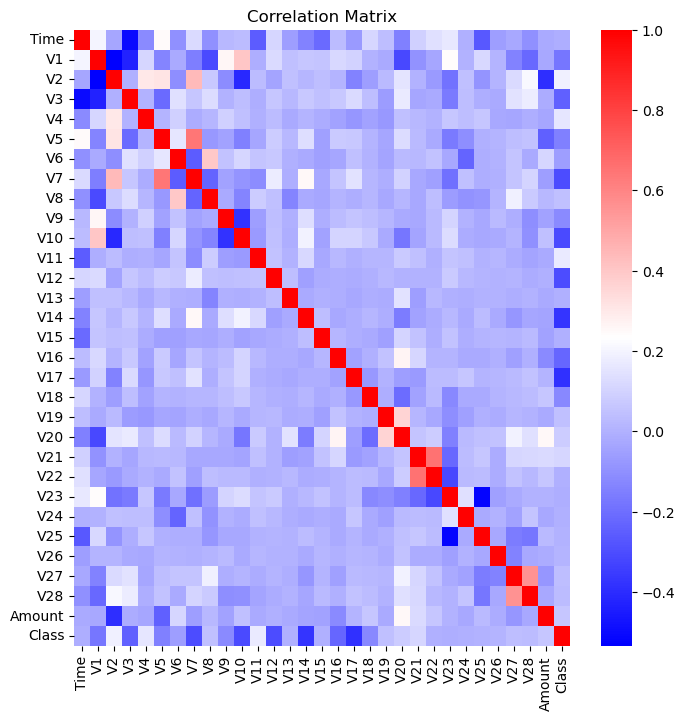

In [8]:
#Correlation Matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='bwr', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
#As we can see in the correlation matrix, most of the variables V1-V28 are not related to each other. However,
#some variables like V3 and V11 are inversely related to Time while V2 is inversely related to Amount.

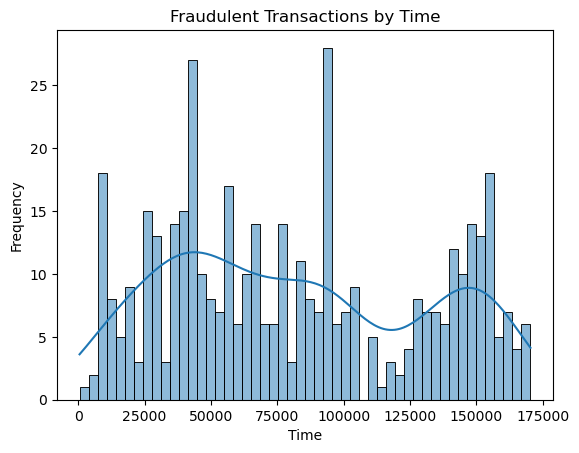

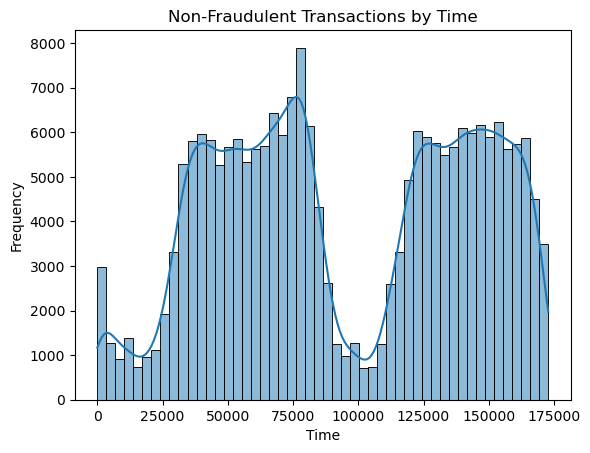

In [9]:
#Creating separate dataframes for fraud and non-fraud transactions
fraud = df[df['Class'] == 1]
not_fraud = df[df['Class'] == 0]

#Now we will visualzie the Fraudulent Transactions by Time to see if there are any trends being followed.
plt.figure()
sns.histplot(fraud['Time'], bins=50, kde=True)
plt.title('Fraudulent Transactions by Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

#Now we will visualzie the Non-Fraudulent Transactions by Time to see if there are any trends being followed.
plt.figure()
sns.histplot(not_fraud['Time'], bins=50, kde=True)
plt.title('Non-Fraudulent Transactions by Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

#We observe that fraudulent transactions exhibit a sporadic distribution over time, with no distinct or repetitive pattern.
#In contrast, non-fraudulent transactions show a clear cyclical pattern, likely reflecting consistent consumer behavior over time. 

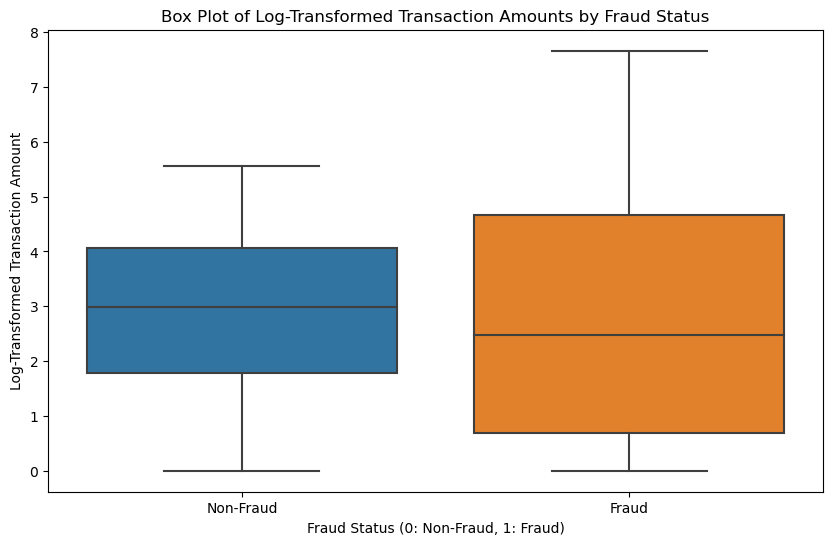

In [10]:
#Log transformation (for better visbility)
df_temp = df
df_temp['log_amount'] = np.log1p(df_temp['Amount'])

plt.figure(figsize=(10, 6))

#Creating a box plot of the log-transformed amounts categorized by fraud status.
sns.boxplot(x='Class', y='log_amount', data=df_temp)
plt.title('Box Plot of Log-Transformed Transaction Amounts by Fraud Status')
plt.xlabel('Fraud Status (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Log-Transformed Transaction Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

#The median amount for non-fraudulent transactions is slightly higher than that for fraudulent transactions. 
#However, the maximum transaction amount in fraudulent cases is significantly greater than in non-fraudulent cases. 
#Additionally, fraudulent transactions exhibit left skewness, while non-fraudulent transactions are nearly symmetrical.

### Module 3: Dimension Reduction


In [11]:
#Importing the necessary libraries to perform PCA.
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [12]:
#Copy the dataframe to avoid making changes in the original dataframe.
new_df = df

In [13]:
# Extract features and target variable
features = new_df.drop(columns=["Class"])  # All columns except 'Class'
target = new_df["Class"].replace({0: 'Not Fraud', 1: 'Fraud'})   #Target variable

In [14]:
#Scaling the data
rob_scaler = RobustScaler()

#Scaling the 'Time' and 'Amount' columns and reshaping to ensure it is in the correct format for scalers.
features['Amount'] = rob_scaler.fit_transform(features['Amount'].values.reshape(-1,1))
features['Time'] = rob_scaler.fit_transform(features['Time'].values.reshape(-1,1))

In [15]:
# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)  

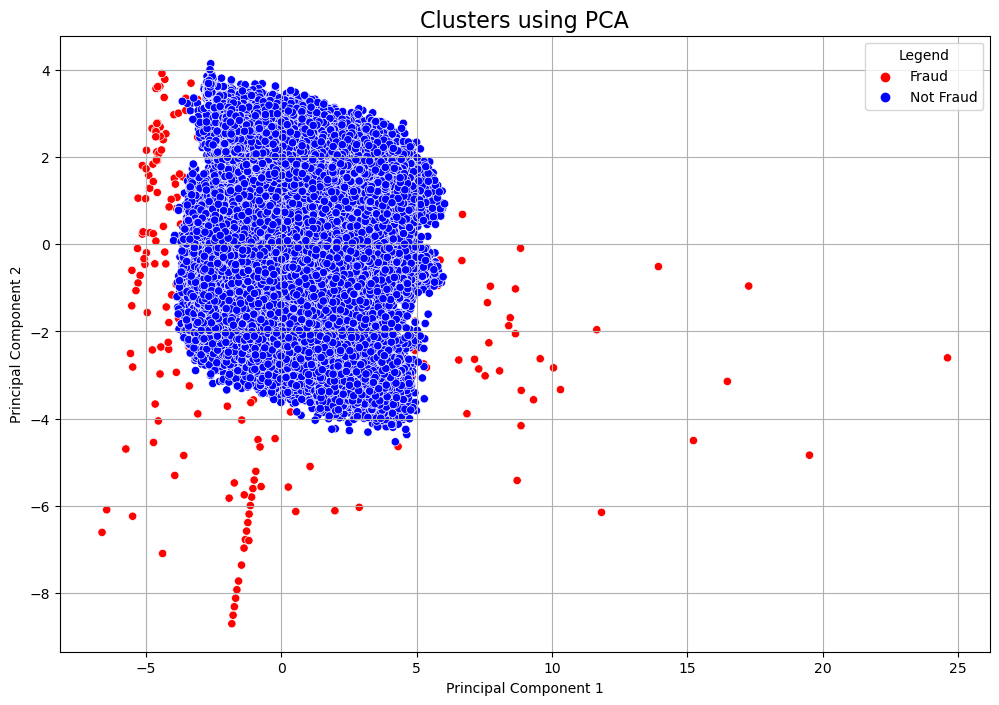

In [16]:
# Create the plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=reduced_features[:, 0], 
    y=reduced_features[:, 1], 
    hue=target, 
    palette={'Not Fraud': 'blue', 'Fraud': 'red'}
)

# Add labels, title, and legend
plt.title('Clusters using PCA', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Legend')

# Show the plot
plt.show()

### Module 4: Classification

In [17]:
###pick 3 classification methods, and methods not in the below list can also be used; you can also pick more than three methods
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Undersampling



In [18]:
#Creating separate dataframes for fraud and non-fraud transactions
not_fraud = df[df['Class']==0]
fraud = df[df['Class']==1]

In [19]:
#Finding out the number of rows our new dataframe.
print(not_fraud.shape)
print(fraud.shape)

(212522, 32)
(442, 32)


In [20]:
#Performing the under-sampling.
notfraud_sample = not_fraud.sample(n=442)
print(notfraud_sample.shape)

#Combining the sample of the non-fraudulent transcations with the fraudulent ones.
undersampled_df = pd.concat([notfraud_sample,fraud],ignore_index=True)
undersampled_df['Class'].value_counts()

(442, 32)


Class
0    442
1    442
Name: count, dtype: int64

# Applying PCA to our undersampled dataframe.

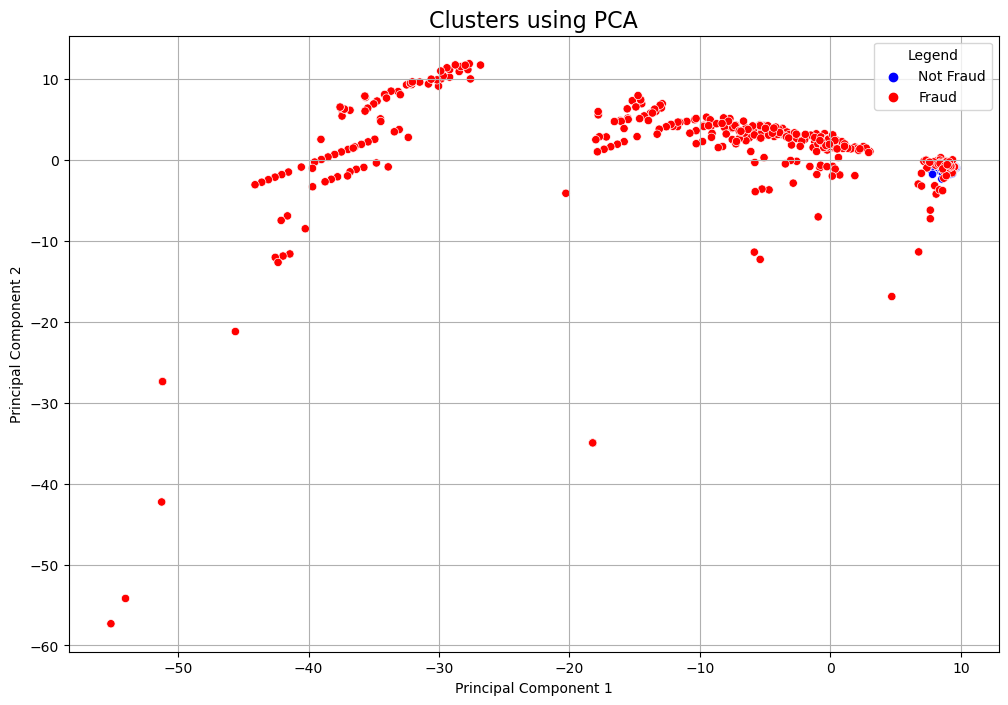

In [21]:
#Copy the dataframe to avoid making changes in the original dataframe.
pca_undersampled_df = undersampled_df

# Extract features and target variable
features1 = pca_undersampled_df.drop(columns=["Class"])  # All columns except 'Class'
target1 = pca_undersampled_df["Class"].replace({0: 'Not Fraud', 1: 'Fraud'})  #Target variable

#Scaling the data
rob_scaler = RobustScaler()

#Scaling the 'Time' and 'Amount' columns and reshaping to ensure it is in the correct format for scalers.
features1['Amount'] = rob_scaler.fit_transform(features1['Amount'].values.reshape(-1,1))
features1['Time'] = rob_scaler.fit_transform(features1['Time'].values.reshape(-1,1))

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=18)
reduced_features1 = pca.fit_transform(features1)  

# Create the plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=reduced_features1[:, 0], 
    y=reduced_features1[:, 1], 
    hue=target1, 
    palette={'Not Fraud': 'blue', 'Fraud': 'red'}
)

# Add labels, title, and legend
plt.title('Clusters using PCA', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Legend')

# Show the plot
plt.show()

# Applying PCA to the test dataset.

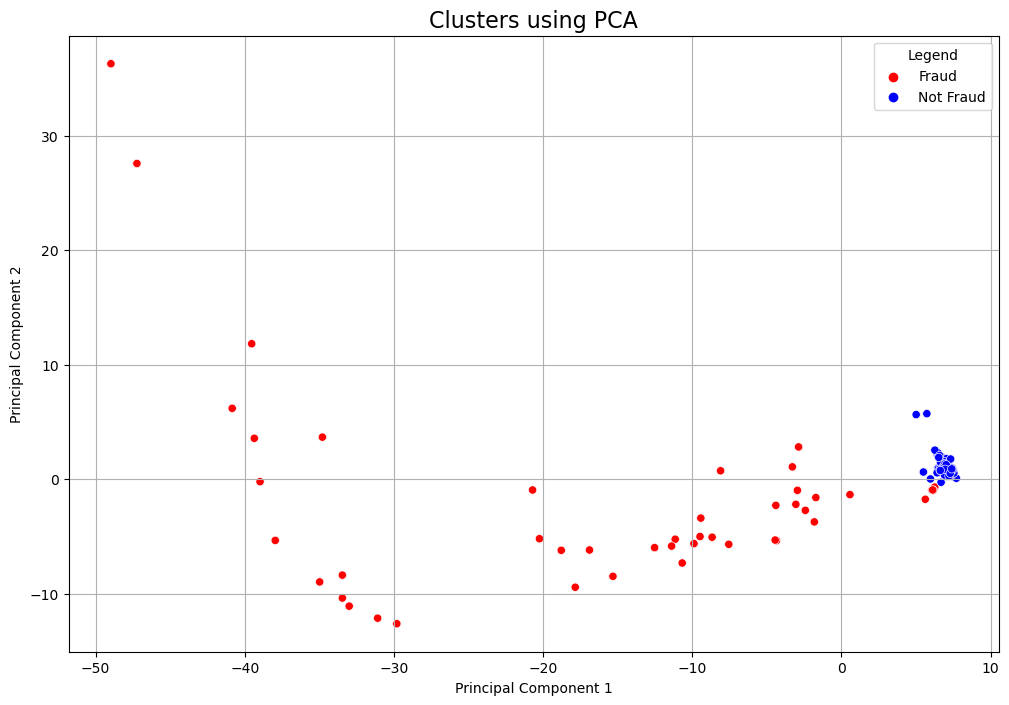

In [22]:
#Load the test dataset
df2 = pd.read_csv('creditcard_test.csv')

#Copy the dataframe to avoid making changes in the original dataframe.
pca_undersampled_df2 = df2

# Extract features and target variable
features2 = pca_undersampled_df2.drop(columns=["Class"])  # All columns except 'Class'
target2 = pca_undersampled_df2["Class"].replace({0: 'Not Fraud', 1: 'Fraud'})  #Target variable

#Scaling the data
rob_scaler = RobustScaler()

#Scaling the 'Time' and 'Amount' columns and reshaping to ensure it is in the correct format for scalers.
features2['Amount'] = rob_scaler.fit_transform(features2['Amount'].values.reshape(-1,1))
features2['Time'] = rob_scaler.fit_transform(features2['Time'].values.reshape(-1,1))

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=18)
reduced_features2 = pca.fit_transform(features2)  

# Create the plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=reduced_features2[:, 0], 
    y=reduced_features2[:, 1], 
    hue=target2, 
    palette={'Not Fraud': 'blue', 'Fraud': 'red'}
)

# Add labels, title, and legend
plt.title('Clusters using PCA', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Legend')

# Show the plot
plt.show()


# Linear Discriminant Analysis

In [23]:
# Importing necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Define LDA model
lda_model = LinearDiscriminantAnalysis()

# Perform cross-validation
lda_cv_acc = cross_val_score(lda_model, reduced_features1, target1, cv=5)
print(f'Cross-validated accuracy: {lda_cv_acc.mean()}')

# Fit the model on the training data
lda_model.fit(reduced_features1, target1)

# Make predictions on training and test sets
train_preds = lda_model.predict(reduced_features1)
test_preds = lda_model.predict(reduced_features2)

# Calculate accuracy
train_accuracy = accuracy_score(target1, train_preds)
test_accuracy = accuracy_score(target2, test_preds)

# Print accuracies
print(f'Training set accuracy: {train_accuracy}')
print(f'Test set accuracy: {test_accuracy}')

Cross-validated accuracy: 0.8936633281972266
Training set accuracy: 0.917420814479638
Test set accuracy: 0.7866666666666666


Training set confusion matrix:


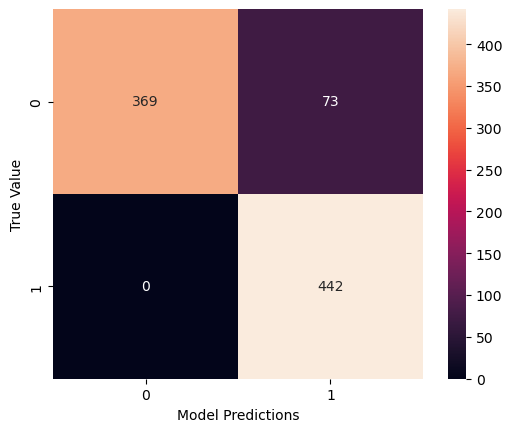

In [24]:
# Training set confusion matric
print('Training set confusion matrix:')
conf_matrix1 = confusion_matrix(target1, train_preds)
sns.heatmap(conf_matrix1, square=True, annot=True, fmt='g')
plt.xlabel('Model Predictions')
plt.ylabel('True Value');

Test set confusion matrix:


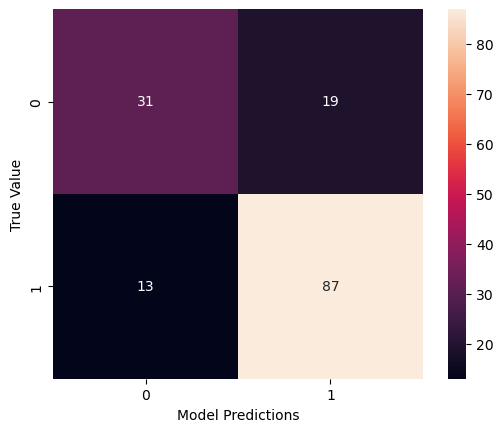

In [25]:
# Test set confusion matrix
print('Test set confusion matrix:')
conf_matrix2 = confusion_matrix(target2, test_preds)
sns.heatmap(conf_matrix2, square=True, annot=True, fmt='g')
plt.xlabel('Model Predictions')
plt.ylabel('True Value');

# Support Vector Machine

In [26]:
#Define SVM model with specified hyperparameters
svm_model = SVC(kernel='rbf', random_state=0)

#Perform cross-validation
svm_cv_acc = cross_val_score(svm_model, reduced_features1, target1, cv=5)
print(f'Cross-validated accuracy: {svm_cv_acc.mean()}')

#Fit the model on the training data
svm_model = SVC()
svm_model.fit(reduced_features1, target1)

#Make predictions on training and test sets
train_preds = svm_model.predict(reduced_features1)
test_preds = svm_model.predict(reduced_features2)

#Calculate accuracy
train_accuracy = accuracy_score(target1, train_preds)
test_accuracy = accuracy_score(target2, test_preds)

#Print accuracies
print(f'Training set accuracy: {train_accuracy}')
print(f'Test set accuracy: {test_accuracy}')

Cross-validated accuracy: 0.9524974319465844
Training set accuracy: 0.9570135746606335
Test set accuracy: 0.7933333333333333


Training set confusion matrix:


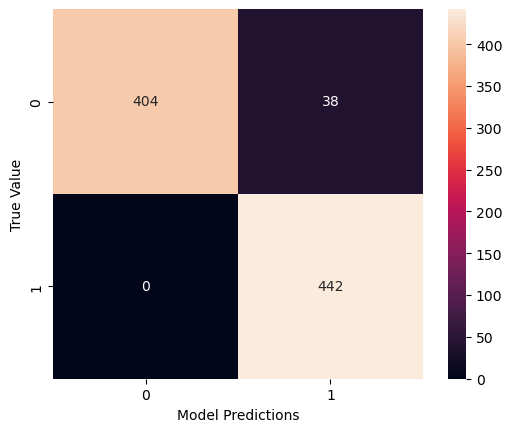

In [27]:
# Training set confusion matric
print('Training set confusion matrix:')
conf_matrix3 = confusion_matrix(target1, train_preds)
sns.heatmap(conf_matrix3, square=True, annot=True, fmt='g')
plt.xlabel('Model Predictions')
plt.ylabel('True Value');

Test set confusion matrix:


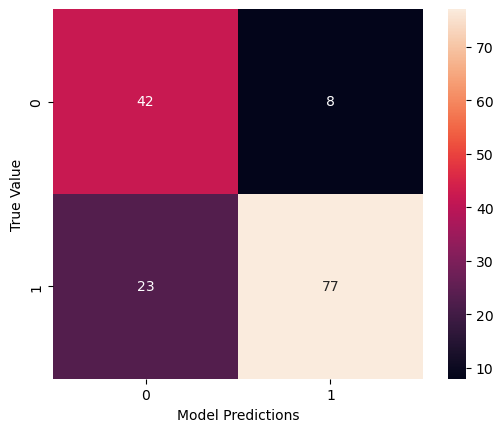

In [28]:
# Test set confusion matrix
print('Test set confusion matrix:')
conf_matrix4 = confusion_matrix(target2, test_preds)
sns.heatmap(conf_matrix4, square=True, annot=True, fmt='g')
plt.xlabel('Model Predictions')
plt.ylabel('True Value');

# K-Nearest Neighbours

In [29]:
# Define KNN model with specified hyperparameters
# Here, n_neighbors=5 is the default (number of neighbors to consider)
knn_model = KNeighborsClassifier()

# Perform cross-validation
knn_cv_acc = cross_val_score(knn_model, reduced_features1, target1, cv=5)
print(f'Cross-validated accuracy: {knn_cv_acc.mean()}')

# Fit the model on the training data
knn_model.fit(reduced_features1, target1)

# Make predictions on training and test sets
train_preds = knn_model.predict(reduced_features1)
test_preds = knn_model.predict(reduced_features2)

# Calculate accuracy
train_accuracy = accuracy_score(target1, train_preds)
test_accuracy = accuracy_score(target2, test_preds)

# Print accuracies
print(f'Training set accuracy: {train_accuracy}')
print(f'Test set accuracy: {test_accuracy}')

Cross-validated accuracy: 0.9468284540318439
Training set accuracy: 0.9638009049773756
Test set accuracy: 0.86


Training set confusion matrix:


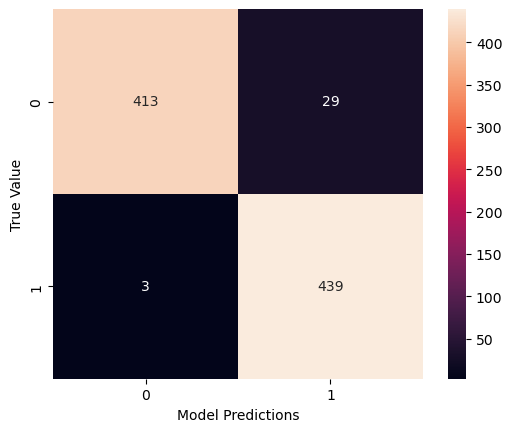

In [30]:
# Training set confusion matric
print('Training set confusion matrix:')
conf_matrix5 = confusion_matrix(target1, train_preds)
sns.heatmap(conf_matrix5, square=True, annot=True, fmt='g')
plt.xlabel('Model Predictions')
plt.ylabel('True Value');

Test set confusion matrix:


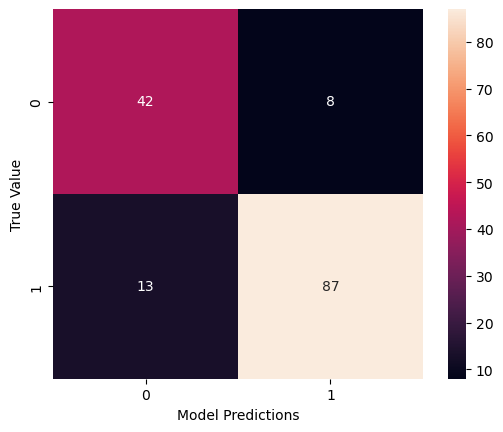

In [31]:
# Test set confusion matrix
print('Test set confusion matrix:')
conf_matrix6 = confusion_matrix(target2, test_preds)
sns.heatmap(conf_matrix6, square=True, annot=True, fmt='g')
plt.xlabel('Model Predictions')
plt.ylabel('True Value');

### Module 5: Summary


- Fraudulent transactions make up a very small percentage (0.172%), highlighting the dataset's imbalance.
- Missing values in columns `V22` and `V23` were handled by dropping rows with null values, resulting in 283,859 rows for analysis.  
- Outliers were retained for fraudulent transactions (`Class = 1`) as they are significant for fraud detection. Outliers in non-fraudulent transactions were removed, leaving 212,964 rows.  


- Most PCA-transformed features (`V1-V28`) are independent, with a few exceptions (e.g., `V3` and `V11` inversely correlated with `Time`, and `V2` inversely correlated with `Amount`).  
- Log-transformed `Amount` revealed differences in fraudulent and non-fraudulent transactions:
     - Non-fraudulent transactions exhibit a symmetrical distribution with fewer extreme values.
     - Fraudulent transactions show a wider range with more outliers, indicating higher variability in transaction amounts. 
     - Median log-transformed amount for Non-Fraudulent transactions is slightly higher than Fraudulent transactions.
     - Therefore, Fraudulent transactions exhibit greater variability in amounts, which may be indicative of fraudulent patterns.
- Time-Based Analysis:
   - Fraudulent Transactions:  
     - The histogram shows an uneven distribution with no clear, repetitive pattern over time.  
     - Peaks appear sporadically, suggesting that fraudulent transactions are not concentrated in specific time intervals. 
   - Non-Fraudulent Transactions:  
     - The histogram shows a clear cyclical pattern, likely tied to consumer behavior (e.g., time of day or spending habits).  
     - Peaks are evenly spaced, indicating consistent transaction activity over time.
   - Therefore, Fraudulent transactions do not follow the same time-dependent trends as non-fraudulent ones, making time-based patterns less reliable for fraud detection.


- Balanced dataset created by under-sampling non-fraudulent transactions to match the number of fraudulent ones (442 each). This addressed the class imbalance issue for model training. PCA was applied to reduce the dimensionality to two components.


- **Linear Discriminant Analysis (LDA)**: Achieved a cross-validated accuracy of about **89%**, training accuracy of about **92%** and test accuracy at around **79%**, which suggests that there might be some overfitting.
- **Support Vector Machine (SVM)**: Showed cross-validated accuracy of about **95%**, training accuracy of about **96%** and test accuracy of around **79%**, indicating potential overfitting.  
- **K-Nearest Neighbors (KNN)**: Delivered a cross-validated accuracy of about **95%**, training accuracy of about **96%** and a better test accuracy of around **86%**, making it the most balanced model for this dataset.
   

**To Summarize:**
   - Fraudulent transactions are distinct in their statistical patterns, such as higher variability in transaction amounts and sporadic distribution over time.  
   - Non-fraudulent transactions exhibit clear time-based trends, while fraudulent ones do not, indicating that time is not a strong predictor for fraud detection.  
   - PCA and log transformations improved the interpretability and modeling performance.  
   - KNN performed best in terms of generalizability with high test accuracy, while SVM displayed greater signs of overfitting compared to LDA.